In [1]:
import pandas as pd
df=pd.DataFrame({
    "study_hours":[1,2,3,4,5,6,7,8,20]
})
df

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [19]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df.describe()

,study_hours
count,9.000000
mean,6.222222
std,5.651942
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,20.000000


#### IQR METHOD

In [6]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
outliers =df[(df<(LB))|(df>(UB))]
outliers# give the outliers and remaining as null values

,study_hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,20.0


In [7]:
q1

study_hours    3.0
Name: 0.25, dtype: float64

In [9]:
q3

study_hours    7.0
Name: 0.75, dtype: float64

In [11]:
IQR

study_hours    4.0
dtype: float64

In [12]:
UB

study_hours    13.0
dtype: float64

In [14]:
LB

study_hours   -3.0
dtype: float64

### METHOD2: z-score method
    z-scor method is a sattical technique taht detects outliers based on how far a data point is from the mean, measured in terms of standard deviation. It lies in the extreme tails of the distribution it assumes the data follows a normal distribution
    A point with a very high or low z-score(typically|z|?3) is flagges as an outlier beacuse it lies in the extreme tails of the distribution
    formula: z=(X-mue)/sigma
    where: 
    x=data value
    mue= mean
    sigma= standard deviation
### why threshold
     z>3 very strict(large datasets)
     z>2 practical for small datasets.

In [16]:
import pandas as pd
df=pd.DataFrame({
    "study_hours":[1,2,3,4,5,6,7,8,20]
})
df

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [22]:
z_scores= np.abs(stats.zscore(df["study_hours"]))## to find the
outliers= df[z_scores>2]
outliers

,study_hours
8,20


In [23]:
z_scores

0    0.980018
1    0.792355
2    0.604692
3    0.417029
4    0.229366
5    0.041703
6    0.145960
7    0.333623
8    2.585579
Name: study_hours, dtype: float64

In [25]:
stats.zscore(df["study_hours"])

0   -0.980018
1   -0.792355
2   -0.604692
3   -0.417029
4   -0.229366
5   -0.041703
6    0.145960
7    0.333623
8    2.585579
Name: study_hours, dtype: float64

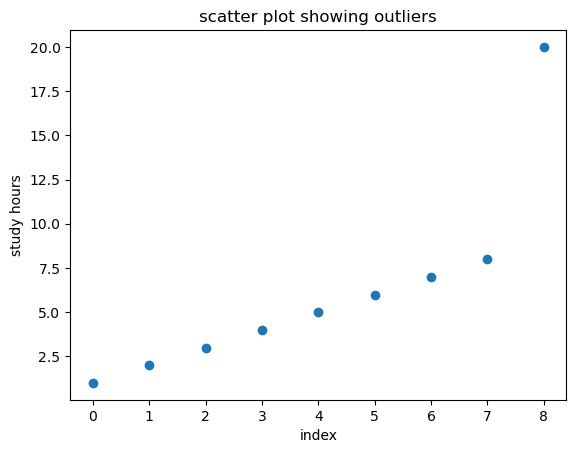

In [27]:
plt.scatter(range(len(df)),df["study_hours"])
plt.xlabel("index")
plt.ylabel("study hours")
plt.title("scatter plot showing outliers")
plt.show()


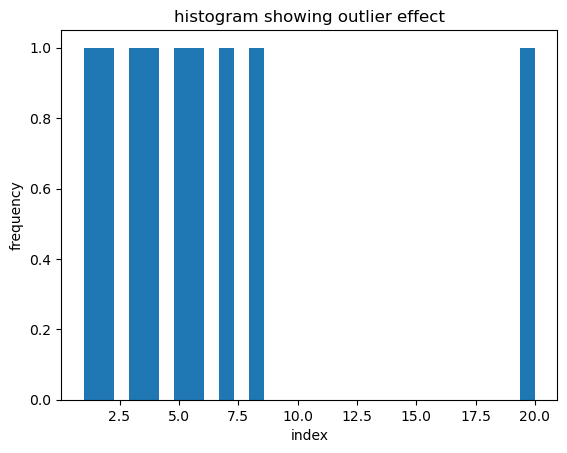

In [36]:
plt.hist(df["study_hours"], bins=30)
plt.xlabel("index")
plt.ylabel("frequency")
plt.title("histogram showing outlier effect")
plt.show()
